In [3]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from WiSARD import WiSARD
import numpy as np
import pandas as pd
import math
import sys
import random
import matplotlib.pyplot as plt
import itertools
# import confusion matrix function
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe prevista')

def thermometer(word_vec, min_=-1.0, max_=1.0, n=20):
    vec = []
    for v in word_vec:
        t = (max_ - min_)/n
        rang = []
        for i in np.arange(min_ + t, max_, t):
            if v > i:
                rang.append(1)
            else:
                break
        rang.extend([0] * (n-len(rang)-1))
        vec.extend(rang)
    return np.array(vec)

def thermometer_one_hot(real_vec, min_=-1.0, max_=1.0, n=20):
    vec = []
    for v in real_vec:
        if v == max_:
            rang = [0] * n
            rang[-1] = 1
            vec.extend(rang)
        else:
            rang = [0] * n
            t = (max_ - min_)
            p = v - min_
            s = int((p / t) * n)
            rang[s] = 1
            vec.extend(rang)
    return np.array(vec)

In [2]:
model = KeyedVectors.load_word2vec_format('../glove.6B.50d.word2vec.txt')

Word2vec with thermometer of 10 bits

Confusion matrix, without normalization
[[ 55  30   0   0 415   0]
 [  0  40   0   0 460   0]
 [  1  44   0   0 455   0]
 [  6  80   0  14 400   0]
 [  1   0   0   0 499   0]
 [  0   2   0   1 497   0]]


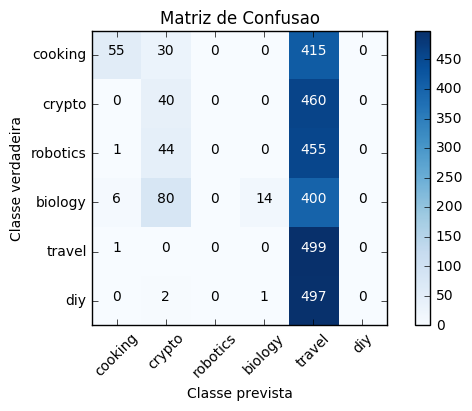

Accuracy: 0.20266666666666666


In [4]:
df = {
    "cooking": pd.read_csv('../dataset/processed/cooking.csv'),
    "crypto": pd.read_csv('../dataset/processed/crypto.csv'),
    "robotics": pd.read_csv('../dataset/processed/robotics.csv'),
    "biology": pd.read_csv('../dataset/processed/biology.csv'),
    "travel": pd.read_csv('../dataset/processed/travel.csv'),
    "diy": pd.read_csv('../dataset/processed/diy.csv'),
    #"physics": pd.read_csv('physics.csv'),
}

X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X.append(thermometer(v, n=10))
            y.append(file)

X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X_test.append(thermometer(v, n=10))
            y_test.append(file)
            
w = WiSARD(2, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
#for i in range(len(X)):
#    w.fit([X[i]], [y[i]])
w.fit(X, y)
result = w.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: '+str(accuracy_score(y_test, result)))

Thermometer of 10 bits predicted with NaiveBayes

Confusion matrix, without normalization
[[ 79   4  28   4 381   4]
 [  1 210 156   1 132   0]
 [  2  29 334   2 133   0]
 [  6  33 163  43 255   0]
 [  1   2   8   0 489   0]
 [  1   5 136   1 349   8]]


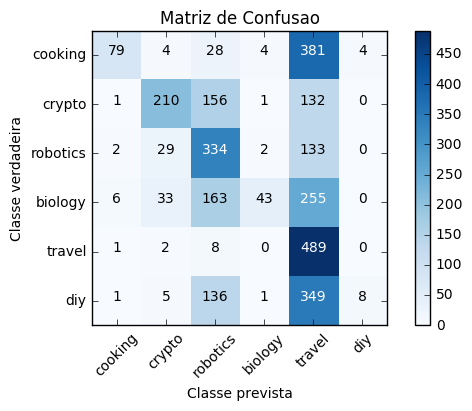

Accuracy: 0.38766666666666666


In [5]:
X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X.append(thermometer(v, n=10))
            y.append(file)

X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X_test.append(thermometer(v, n=10))
            y_test.append(file)
            
from sklearn.naive_bayes import GaussianNB
w = GaussianNB()
w.fit(X, y)
result = w.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: '+str(accuracy_score(y_test, result)))

No thermometer and prediction made with NaiveBayes

Confusion matrix, without normalization
[[446   4   2   4   7  37]
 [  2 447  15  22  12   2]
 [  4  65 366  24   8  33]
 [ 14  36  22 371  19  38]
 [  6   9  12   7 460   6]
 [ 14   2  23  15  12 434]]


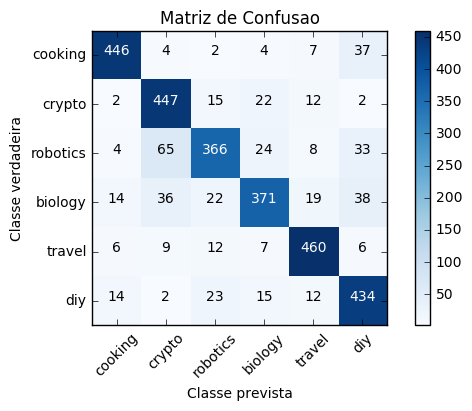

Accuracy: 0.8413333333333334


In [6]:
X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X.append(v)
            y.append(file)

X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X_test.append(v)
            y_test.append(file)
            
from sklearn.naive_bayes import GaussianNB
w = GaussianNB()
w.fit(X, y)
result = w.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: '+str(accuracy_score(y_test, result)))

Thermometer of 50 bits and prediction made with WiSARD

Confusion matrix, without normalization
[[ 87  11  17   2 383   0]
 [  0  60   3   2 435   0]
 [  1  98   5   1 395   0]
 [ 14  66  29  30 360   1]
 [  0   0   1   0 499   0]
 [  8   5   3   2 482   0]]


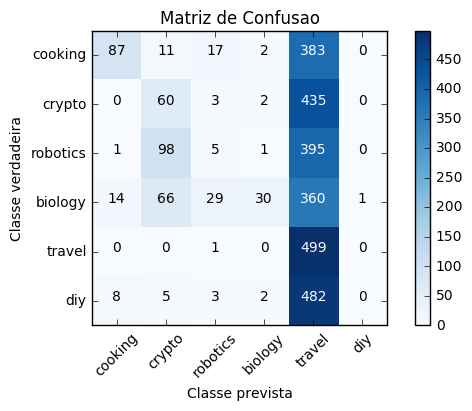

Accuracy: 0.227


In [10]:
X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X.append(thermometer(v, n=50))
            y.append(file)

X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X_test.append(thermometer(v, n=50))
            y_test.append(file)
            
w = WiSARD(2, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
#for i in range(len(X)):
#    w.fit([X[i]], [y[i]])
w.fit(X, y)
result = w.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: '+str(accuracy_score(y_test, result)))

Thermometer of 50 bitd and predicted with NaiveBayes

Confusion matrix, without normalization
[[193  61   2   7 111 126]
 [  0 483   1   6   9   1]
 [  3 390  80   4  11  12]
 [  7 183  83 133  68  26]
 [  1  73   4   0 419   3]
 [  3 141  16   3  94 243]]


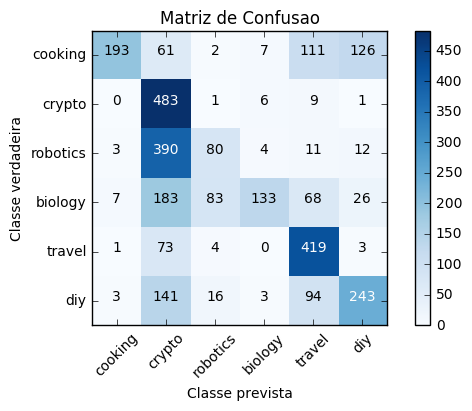

Accuracy: 0.517


In [11]:
X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X.append(thermometer(v, n=50))
            y.append(file)

X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X_test.append(thermometer(v, n=50))
            y_test.append(file)
            
from sklearn.naive_bayes import GaussianNB
w = GaussianNB()
w.fit(X, y)
result = w.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: '+str(accuracy_score(y_test, result)))

Image comparison of 10 bits regular thermometer and proposed

fianc and are looking for good caribbean cruise october and were wondering which islands are best see and which cruise line take seems like lot the cruises don run this month due hurricane season looking for other good options edit travelling
why use table the first step des algorithm and one the end the algorithm
imagine wheel soccer robot what type controller would you use for spinning pid the goal for this controller that should make the robot stand defined angle degree and turn back rotated hand other robot use stepper motors for robot and not servos need implement this software have written sample type controller already and the movement fairly good but would like make better possible the code follows correction range which robot has movement degree number between and which returned from the compass motorspeed number between and which applied the pwm
chocolate chips cookies are always too crisp how can get chewy cookies like those starbucks thank you everyone who has answered far 

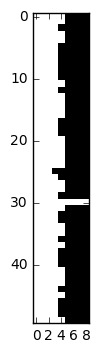

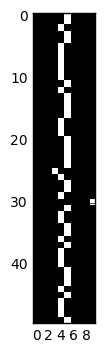

In [23]:
from matplotlib import pyplot

X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X.append(thermometer(v, n=10))
            print(doc)
            y.append(file)
            break
            
pixels = np.array(X[0], dtype='uint8')
# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((50, 9))

# Plot
pyplot.imshow(pixels, cmap='gray', interpolation='nearest')
pyplot.show()

X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X.append(thermometer_one_hot(v, n=10))
            #print(doc)
            y.append(file)
            break
            
pixels = np.array(X[0], dtype='uint8')
# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((50, 10))

# Plot
pyplot.imshow(pixels, cmap='gray', interpolation='nearest')
pyplot.show()

Proposed thermometer with 10 bits WiSARD

Confusion matrix, without normalization
[[241   2   2   5   1 249]
 [  0 220   2   2  12 264]
 [  2  53  68   4   5 368]
 [ 13  32   2 186  14 253]
 [  9  27   2   4 276 182]
 [  1   0   6   3   2 488]]


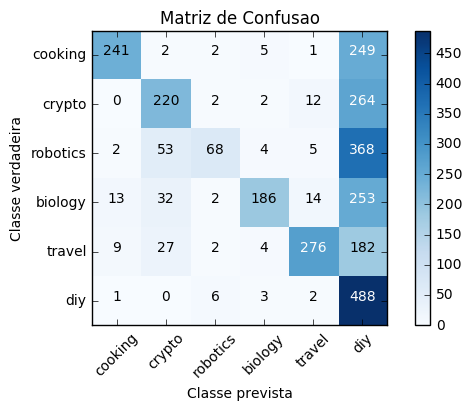

Accuracy: 0.493


In [24]:
X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X.append(thermometer_one_hot(v, n=10))
            y.append(file)

X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X_test.append(thermometer_one_hot(v, n=10))
            y_test.append(file)
            
w = WiSARD(2, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
#for i in range(len(X)):
#    w.fit([X[i]], [y[i]])
w.fit(X, y)
result = w.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: '+str(accuracy_score(y_test, result)))

Proposed with NaiveBayes

Confusion matrix, without normalization
[[161  10  41   2 273  13]
 [  1 321 109   3  66   0]
 [  2  59 380   5  52   2]
 [  7  68 159  77 187   2]
 [  1  10  12   2 475   0]
 [  1  10 141   5 252  91]]


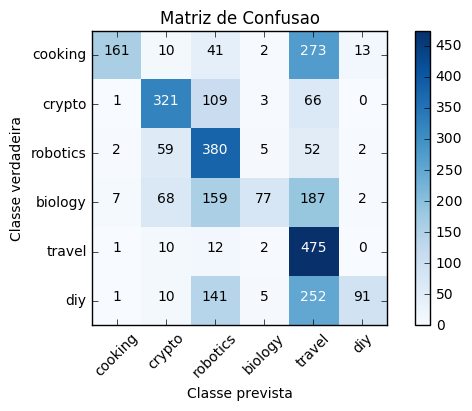

Accuracy: 0.5016666666666667


In [25]:
X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X.append(thermometer_one_hot(v, n=10))
            y.append(file)

X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X_test.append(thermometer_one_hot(v, n=10))
            y_test.append(file)
            
from sklearn.naive_bayes import GaussianNB
w = GaussianNB()
w.fit(X, y)
result = w.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: '+str(accuracy_score(y_test, result)))

Proposed with 50 bits and n=4 WiSARD

Confusion matrix, without normalization
[[442   6  10   5  10  27]
 [  2 384  73  27   9   5]
 [  5  50 382  30   4  29]
 [ 17  34  38 362  19  30]
 [  6  13  17   6 449   9]
 [ 21   5  50  11  25 388]]


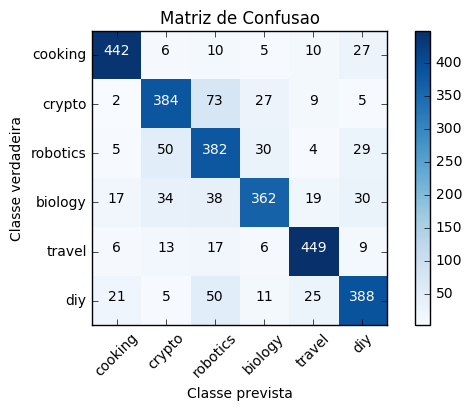

Accuracy: 0.8023333333333333


In [26]:
X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X.append(thermometer_one_hot(v, n=50))
            y.append(file)

X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X_test.append(thermometer_one_hot(v, n=50))
            y_test.append(file)
            
w = WiSARD(4, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
#for i in range(len(X)):
#    w.fit([X[i]], [y[i]])
w.fit(X, y)
result = w.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: '+str(accuracy_score(y_test, result)))

For n=8

Confusion matrix, without normalization
[[435   2   6   8   9  40]
 [  3 365  83  32   8   9]
 [  4  42 372  36   7  39]
 [ 16  26  28 377  17  36]
 [  6  13  18   6 442  15]
 [ 19   2  45  13  18 403]]


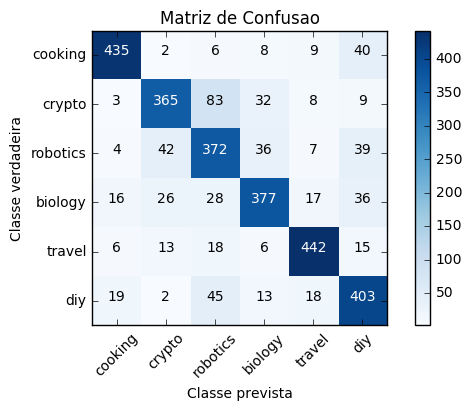

Accuracy: 0.798


In [27]:
X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X.append(thermometer_one_hot(v, n=50))
            y.append(file)

X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X_test.append(thermometer_one_hot(v, n=50))
            y_test.append(file)
            
w = WiSARD(8, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
#for i in range(len(X)):
#    w.fit([X[i]], [y[i]])
w.fit(X, y)
result = w.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: '+str(accuracy_score(y_test, result)))

Proposed thermometer with 100 bits, n=4 and WiSARD

Confusion matrix, without normalization
[[446   4   8   5   6  31]
 [  3 394  48  39   8   8]
 [  5  69 341  39   6  40]
 [ 13  33  13 399  15  27]
 [  7   9  16  13 444  11]
 [ 19   9  33  12  19 408]]


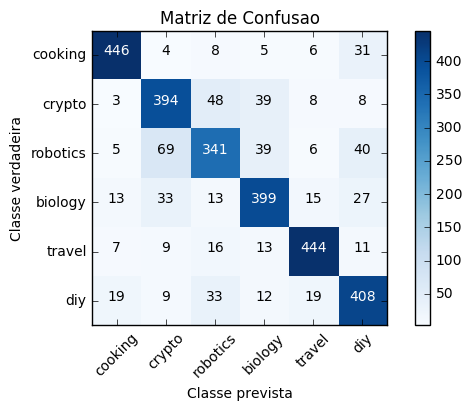

Accuracy: 0.8106666666666666


In [28]:
X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X.append(thermometer_one_hot(v, n=100))
            y.append(file)

X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        if type(df[file].iloc[i]['content']) is str:
            doc = df[file].iloc[i]['content']
            v = np.array([0] * 50)
            w = doc.split(' ')
            for j in w:
                if j in model:
                    v = np.add(v, model[j])
            v = v / np.linalg.norm(v) # normalized
            X_test.append(thermometer_one_hot(v, n=100))
            y_test.append(file)
            
w = WiSARD(4, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
#for i in range(len(X)):
#    w.fit([X[i]], [y[i]])
w.fit(X, y)
result = w.predict(X_test)


# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: '+str(accuracy_score(y_test, result)))